In [1]:
import hist
from hist import Hist
import numpy as np

In [2]:
h = Hist(hist.axis.Regular(bins=50, start=0, stop=1, name="x"),
         hist.axis.Regular(bins=50, start=0, stop=1, name="y"))
h

Hist(
  Regular(50, 0, 1, name='x', label='x'),
  Regular(50, 0, 1, name='y', label='y'),
  storage=Double())

In [3]:
x = np.random.normal(0.5, 0.1, size=100)
y = np.random.normal(0.5, 0.05, size=100)
x,y

(array([0.52476195, 0.61973746, 0.42569326, 0.3534973 , 0.59669095,
        0.40507749, 0.45715345, 0.61179831, 0.34683691, 0.55422834,
        0.49805723, 0.58744985, 0.39584062, 0.48421433, 0.30358205,
        0.48893824, 0.39395973, 0.70788899, 0.45070625, 0.63554417,
        0.3903264 , 0.35937132, 0.51359419, 0.5363394 , 0.63933986,
        0.56180186, 0.37633594, 0.50146706, 0.47802744, 0.34760413,
        0.41457668, 0.35208447, 0.59580717, 0.4304825 , 0.66451133,
        0.31634776, 0.29210862, 0.25208234, 0.61848639, 0.4745755 ,
        0.61071398, 0.36164116, 0.53556183, 0.53397543, 0.43735206,
        0.53564259, 0.54606302, 0.58649024, 0.32026035, 0.51971314,
        0.55767233, 0.50203808, 0.41759254, 0.50706779, 0.40856444,
        0.46082482, 0.60833744, 0.31291661, 0.58847746, 0.56825217,
        0.68889423, 0.53264629, 0.54340127, 0.45653357, 0.7690102 ,
        0.63155136, 0.46687143, 0.36096515, 0.28104716, 0.52677211,
        0.49973358, 0.49090362, 0.53088952, 0.58

In [4]:
h.fill(x,y)

Hist(
  Regular(50, 0, 1, name='x', label='x'),
  Regular(50, 0, 1, name='y', label='y'),
  storage=Double()) # Sum: 100.0

In [5]:
h.view()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
h[2,2] = 40
h

Hist(
  Regular(50, 0, 1, name='x', label='x'),
  Regular(50, 0, 1, name='y', label='y'),
  storage=Double()) # Sum: 140.0

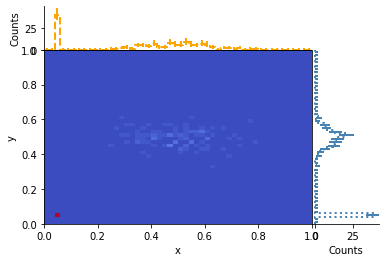

In [7]:
h.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
);

In [8]:
import inspect
import mplhep

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff54acb8790>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ff54acb8c70>, text=[])

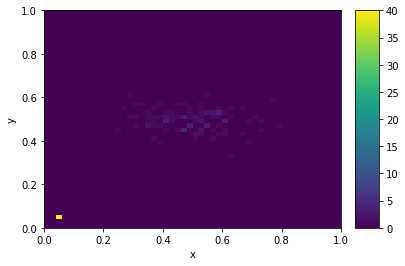

In [9]:
mplhep.hist2dplot(h)

In [10]:
h1 = h.project('x')
h2 = h.project('y')
h1

Hist(Regular(50, 0, 1, name='x', label='x'), storage=Double()) # Sum: 140.0

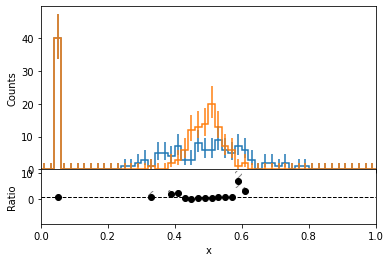

In [11]:
h1.plot_ratio(h2, rp_uncert_draw_type="bar", rp_uncertainty_type='poisson');

In [12]:
inspect.signature(h1.plot_ratio)

<Signature (other: 'hist.BaseHist | Callable[[np.typing.NDArray[Any]], np.typing.NDArray[Any]] | str', *, ax_dict: 'dict[str, matplotlib.axes.Axes] | None' = None, **kwargs: 'Any') -> 'tuple[MainAxisArtists, RatiolikeArtists]'>

In [14]:
from coffea.util import load

In [38]:
output = load("/work/dvalsecc/ttHbb/PocketCoffea/output/btagSF_calibration_v57/output.coffea")
output.keys()

dict_keys(['sum_genweights', 'cutflow', 'sumw', 'seed_chunk', 'hist_muon_pt', 'hist_muon_eta', 'hist_muon_phi', 'hist_electron_pt', 'hist_electron_eta', 'hist_electron_phi', 'hist_jet_pt', 'hist_jet_eta', 'hist_jet_phi', 'hist_jet_btagDeepFlavB', 'hist_nmuon', 'hist_nelectron', 'hist_nlep', 'hist_njet', 'hist_nbjet', 'hist_Ht', 'hist2d_Njet_Ht', 'scale_genweight'])

In [41]:
A = output["hist2d_Njet_Ht"].to_hist()
A

Hist(
  StrCategory(['TTToSemiLeptonic', 'ttHTobb'], growth=True, name='sample', label='Sample'),
  StrCategory(['2b', '2b_btagSF', '3b', '3b_btagSF', 'btagSF', 'btagSF_calib', 'no_btagSF'], growth=True, name='cat', label='Cat'),
  StrCategory(['2018'], growth=True, name='year', label='Year'),
  Variable([4, 5, 6, 7, 8, 9, 11, 20], name='Njet', label='N Jets'),
  Variable([0, 500, 650, 800, 1000, 1200, 1400, 1600, 1800, 2000, 5000], name='Ht', label='$H_T$ Jets'),
  storage=Weight()) # Sum: WeightedSum(value=1.22888e+07, variance=2.10916e+08)

In [44]:
A.axes

(StrCategory(['TTToSemiLeptonic', 'ttHTobb'], growth=True, name='sample', label='Sample'),
 StrCategory(['2b', '2b_btagSF', '3b', '3b_btagSF', 'btagSF', 'btagSF_calib', 'no_btagSF'], growth=True, name='cat', label='Cat'),
 StrCategory(['2018'], growth=True, name='year', label='Year'),
 Variable([4, 5, 6, 7, 8, 9, 11, 20], name='Njet', label='N Jets'),
 Variable([0, 500, 650, 800, 1000, 1200, 1400, 1600, 1800, 2000, 5000], name='Ht', label='$H_T$ Jets'))

In [21]:
h_c = h_coffea.sum('year', 'cat', 'var')
h_c

<Hist (sample,pt,etaSC) instance at 0x7ff5f5415d30>

In [30]:
mappa = h_c.to_hist()

In [36]:
mappa.name = 'my_histo'
mappa.label = 'out'


AttributeError: 'Hist' object has no attribute 'type'

In [33]:
import correctionlib, rich
import correctionlib.convert

In [34]:
clibcorr = correctionlib.convert.from_histogram(mappa)
clibcorr.description = "SF to correct the overall normalization after the application of btagSF weights"

ValidationError: 1 validation error for Variable
type
  unexpected value; permitted: 'string', 'int', 'real' (type=value_error.const; given=str; permitted=('string', 'int', 'real'))